# Agrim Gupta
# PE 23
# E2

Problem Statement 11:

Use a Wine data set to cluster different types of wines using k-means clustering algorithm
•Display the correlation amongst the attributes of the dataset.

•Find and plot the optimal number of clusters for Alcohol and Magnesium. (elbow method)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("wine.csv")
df.head(178)

,Label,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.corr(method='kendall')

,Label,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Label,1.000000,-0.238984,0.247494,-0.038085,0.449402,-0.184992,-0.590404,-0.725255,0.379234,-0.450225,0.065124,-0.479229,-0.607572,-0.406260
Alcohol,-0.238984,1.000000,0.093844,0.170154,-0.212978,0.250506,0.209099,0.191087,-0.109554,0.133526,0.434353,-0.021717,0.061513,0.449387
Malic_Acid,0.247494,0.093844,1.000000,0.158178,0.210119,0.050869,-0.174929,-0.211918,0.175129,-0.168714,0.195607,-0.388707,-0.162909,-0.044660
Ash,-0.038085,0.170154,0.158178,1.000000,0.258352,0.254246,0.089855,0.049474,0.098937,0.018240,0.187786,-0.037234,-0.006341,0.171574
Ash_Alcanity,0.449402,-0.212978,0.210119,0.258352,1.000000,-0.121005,-0.256669,-0.309865,0.278091,-0.171404,-0.057281,-0.239210,-0.226253,-0.313218
Magnesium,-0.184992,0.250506,0.050869,0.254246,-0.121005,1.000000,0.172195,0.161603,-0.158361,0.117871,0.241781,0.023760,0.034307,0.343016
Total_Phenols,-0.590404,0.209099,-0.174929,0.089855,-0.256669,0.172195,1.000000,0.701999,-0.310443,0.466517,0.028264,0.289210,0.478267,0.280203
Flavanoids,-0.725255,0.191087,-0.211918,0.049474,-0.309865,0.161603,0.701999,1.000000,-0.378099,0.534615,0.028674,0.354372,0.520448,0.263661
Nonflavanoid_Phenols,0.379234,-0.109554,0.175129,0.098937,0.278091,-0.158361,-0.310443,-0.378099,1.000000,-0.269189,0.036065,-0.179755,-0.363787,-0.174108
Proanthocyanins,-0.450225,0.133526,-0.168714,0.018240,-0.171404,0.117871,0.466517,0.534615,-0.269189,1.000000,-0.014962,0.231071,0.369104,0.204172


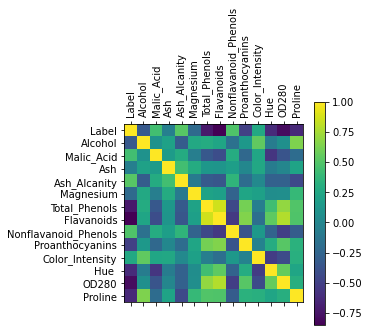

In [3]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [9]:
x = df.iloc[:, [1,5]].values

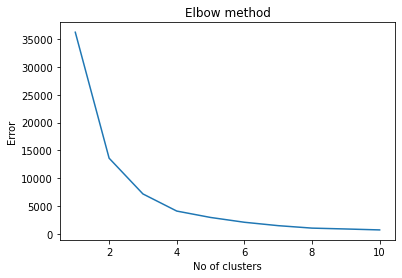

In [10]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    Error.append(kmeans.inertia_)
    

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [20]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

centroids = kmeans3.cluster_centers_
centroids

[1 2 2 2 1 2 2 1 2 2 2 0 0 0 2 2 1 1 2 1 1 2 2 0 2 1 0 0 2 2 2 2 2 1 2 2 2
 2 2 1 1 0 2 2 2 2 2 2 2 2 0 0 2 1 1 1 1 2 2 0 2 2 0 0 2 2 0 0 2 1 2 0 0 1
 2 2 0 2 1 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 1 1 0 0 0 2 0 2 0 0 0 0 0 0 0 2
 0 2 0 0 0 0 2 0 0 2 1 2 0 0 0 0 0 0 0 1 2 2 2 0 0 0 2 0 2 2 0 2 0 2 2 0 0
 0 2 1 2 1 2 2 0 0 2 2 0 0 2 2 2 0 0 2 0 2 2 2 0 0 0 2 1 1 2]


array([[ 12.71716216,  87.32432432],
       [ 13.32769231, 125.11538462],
       [ 13.16051282, 103.06410256]])

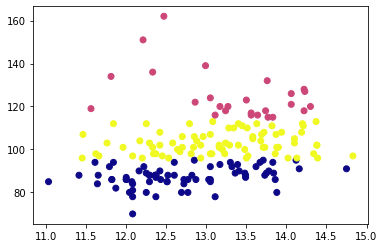

In [23]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans3,cmap='plasma')
# ax = plt.axes()
# for i in range(0,2):
    
#     ax.arrow(dx = centroids[i][0], dy = centroids[i][1])
plt.show()